# Trabajo Práctico - Organización de Datos
## Parte 1 - Análisis de datos
- Continanza, Nicolás (97576)
- De Angelis Riva, Lukas Nahuel  (103784)

FIUFIP: Que No Se Escape Nadie (?)
A partir de la información recolectada por FIUFIP, queremos hacer un análisis que nos permita inferir qué ciudadanos tienen un alto poder adquisitivo. Para esto, y tomando en cuenta la información con la que contamos y sus limitaciones, creemos que será valioso poder responder las siguientes preguntas, y evaluar si nos aportan información útil:

1. ¿Cuántas personas tienen un alto poder adquisitivo en los datos recolectados por la agencia?
2. ¿Hay alguna relación entre la edad de las personas encuestadas y su poder adquisitivo?
3. ¿Existe un cambio notable en la respuesta a la pregunta anterior si separamos la muestra por género?
4. Respondiendo las tres preguntas anteriores podríamos encontrar una relación entre las variables edad y género, y sería interesante saber qué tan similar o disímil es la variable edad entre los tipos de trabajo que realizan. Entonces, ¿Cómo se distribuye la edad de las personas encuestadas según su trabajo?
6. ¿Qué se puede decir sobre los tipos de sala más elegidos separando a los encuestados por edad?
7.
8.

## Imports y puesta en escena

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
import matplotlib

import numpy as np

GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)
SYSARMY_2020_2_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=SYSARMY_2020_2_GID))

In [9]:
def feature_engineering(df):
    # Missings en barrio
    data_set_mejorado = df.copy()
    barrios = df['barrio'].dropna()
    cantidad = df['barrio'].isna().value_counts()[True]
    muestra = barrios.sample(cantidad)
    it = iter(muestra)
    data_set_mejorado['barrio'] = data_set_mejorado['barrio'].apply(lambda x: next(it) if str(x) == 'nan' else x)

    # Missings en categoría de trabajo
    data_set_mejorado['categoria_de_trabajo'] = data_set_mejorado['categoria_de_trabajo'].apply(lambda x: 'Sin categoria' if str(x) == 'nan' else x)

    # Missings en trabajo
    data_set_mejorado['trabajo'] = data_set_mejorado['trabajo'].apply(lambda x: 'No responde' if str(x) == 'nan' else x)

    # Eliminación de categoría "sin trabajo"
    data_set_mejorado = data_set_mejorado[data_set_mejorado.categoria_de_trabajo != 'sin_trabajo']

    # Eliminación de el atributo eduación alcanzada
    del data_set_mejorado['educacion_alcanzada']

    # Juntamos casado y casada en una misma categoría.
    data_set_mejorado['rol_familiar_registrado'] = data_set_mejorado['rol_familiar_registrado'].apply(lambda x : 'casado' if x == 'casada' else x)
    
    return data_set_mejorado

In [10]:
df = feature_engineering(df)

## Porcentaje con alto VA

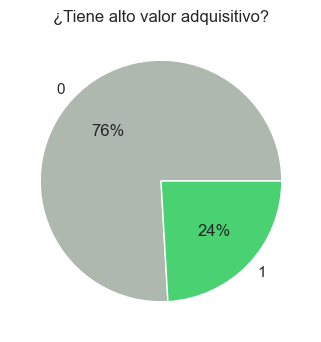

In [11]:
plt.figure(dpi=100)
df["tiene_alto_valor_adquisitivo"].value_counts().plot(
    kind='pie', autopct='%1.0f%%', colors=['#AEB8AF', '#4AD172']
)
plt.title('¿Tiene alto valor adquisitivo?')
plt.ylabel("")
plt.show()

## Relación con la edad

### Histograma por edad

Estudiamos la distribución de edades en la muestra tomada, agrupando en bins de a 10 años la cantidad de personas en la muestra

! Cambiar este gráfico verde por la misma onda que el de abajo


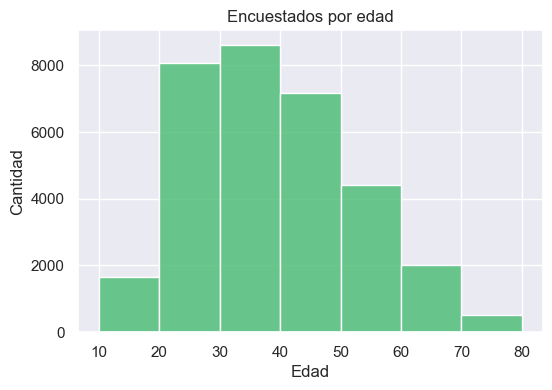

In [12]:
plt.figure(dpi=100)
sns.histplot(
    x='edad',
    data=df,
    color=(0.23, 0.72, 0.41),
    bins=range(10, df['edad'].max(), 10)
)
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.title("Encuestados por edad")
plt.show()

### Relación entre rango etario con el poder adquisitivo

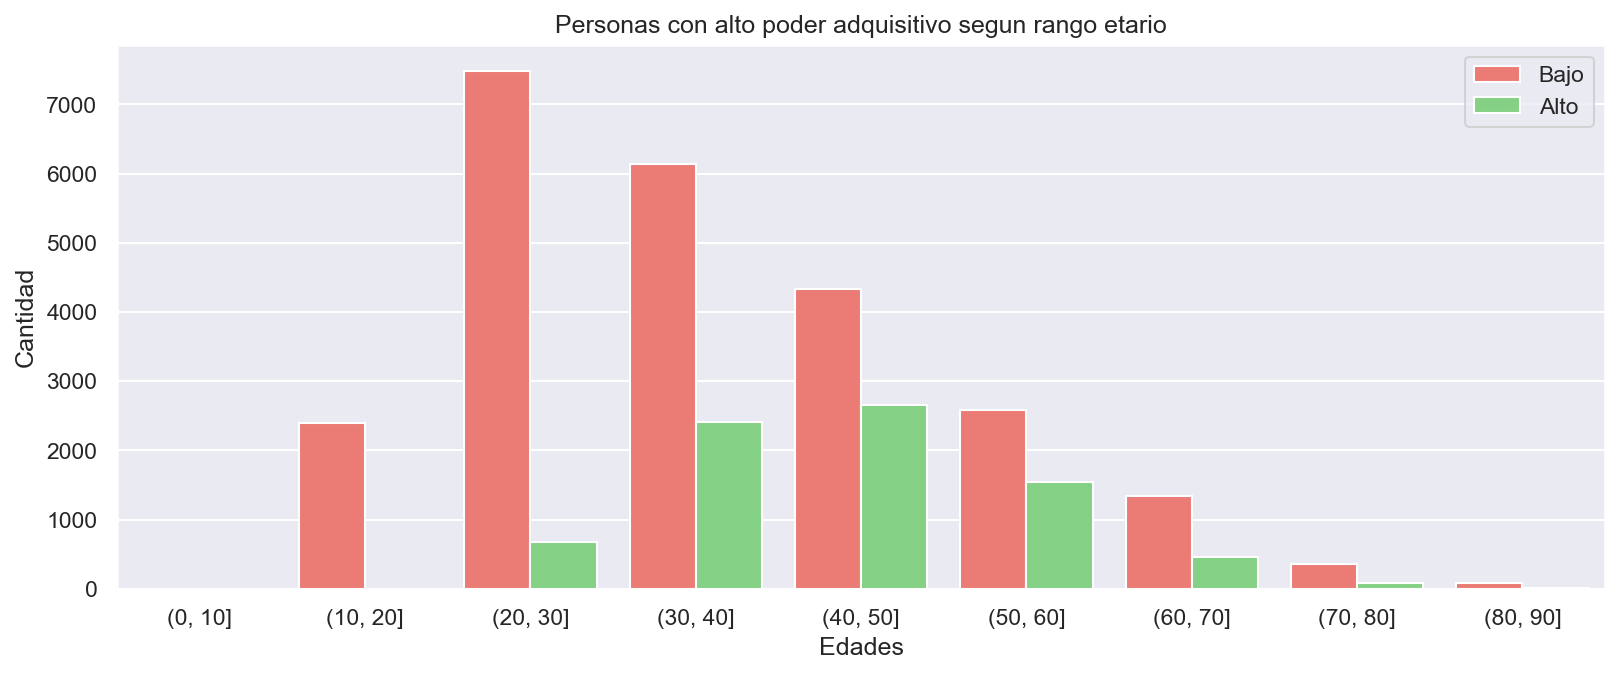

In [13]:
df_tmp = pd.DataFrame([df.edad, df.tiene_alto_valor_adquisitivo]).transpose()
df_tmp['bins'] = pd.cut(df_tmp.edad, range(0, int(df_tmp['edad'].max()) + 10,10))
# Configuro el grafico, armo el countplot y setteo labels varios
fig, ax = plt.subplots(dpi=150, figsize=(6.4 * 2, 4.8))
sns.countplot(data = df_tmp, x = 'bins', hue='tiene_alto_valor_adquisitivo', ax = ax, palette = ['#ff6961', '#77dd77'])
ax.set_title('Personas con alto poder adquisitivo segun rango etario')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad')
plt.legend(['Bajo', 'Alto'], loc='upper right')

### LinePlot edad y mean

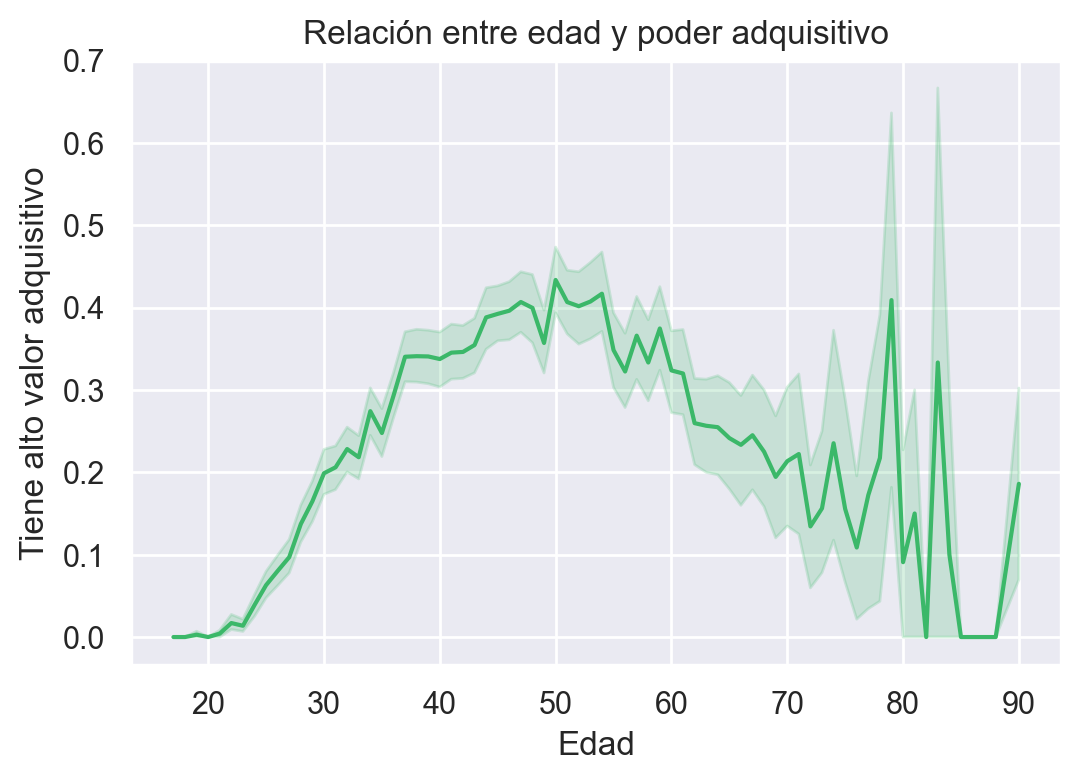

In [14]:
plt.figure(dpi=200)
sns.lineplot(
    data = df,
    x = 'edad',
    y = 'tiene_alto_valor_adquisitivo',
    color=(0.23, 0.72, 0.41)
)
plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Edad")
plt.title('Relación entre edad y poder adquisitivo')
plt.show()

Se puede observar como los valores intermedios de edad, es decir aquellos entre 35 y 65 tienen la mayor densidad de población con alto poder adquisitivo.

Asímismo también notar que los valores posteriores, es decir aquellos mayores a 80 tienen valores fluctuantes y poco fiables, esto probablemente se deba a la escasez de datos para dichas edades, como se puede ver en el histograma previo.
Veamos de descartar para el lineplot la información fuera de el rango [35, 70]


## Relación con la declaración de gananacias, pérdidas o no declaración en bolsa.

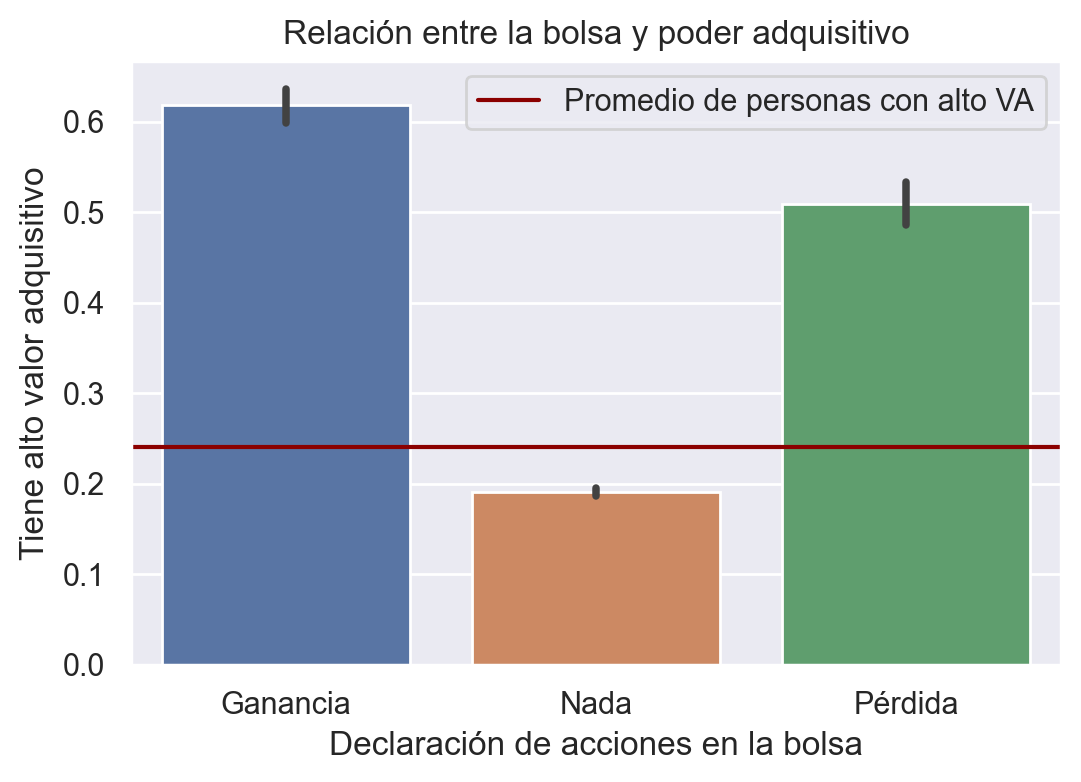

In [15]:
def determinar_categoria_en_bolsa(accion_en_bolsa):
    if(accion_en_bolsa > 0):
        return 'Ganancia'
    elif(accion_en_bolsa < 0):
        return 'Pérdida'
    else:
        return 'Nada'

plt.figure(dpi=200)

df_bolsa_vs_va = df[['ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_bolsa_vs_va['bolsa'] = df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
del df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina']

ax = sns.barplot(
    data=df_bolsa_vs_va,
    x='bolsa',
    y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Declaración de acciones en la bolsa")
plt.title('Relación entre la bolsa y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Parece haber una relación bastante marcada con la gente que declaró un balance neto 0 en acciones de la bolsa y su poder adquisitivo. Siendo este casi de un 80%.

También se aprecia una leve inclinación positiva para la gente que declaró haber obtenido una ganancia en la bolsa.

Por último, al declarar un balance negativo en la bolsa deja a la mitad de las personas con poder adquisitivo alto y a la otra mitad con poder adquisitivo alto.

Dado que el promedio general de personas con poder adquisitivo alto es de aproximadamente un 25%, si sabemos que una persona toma acciones en la bolsa (sean pérdidsa o ganancias) se obtiene un promedio de casi el doble.

Es decir, este parámetro parece estar afectado en índice de poder adquisitivo.

### Relación entre localidad y poder adquisitivo

In [16]:
# Ver con qué cantidad de muestras lo consideramos significativo o no. Esto está en pañales.
cant = 50

tabla = df['barrio'].value_counts()
barrios_significativos = tabla[tabla > cant].reset_index()['index'].unique()

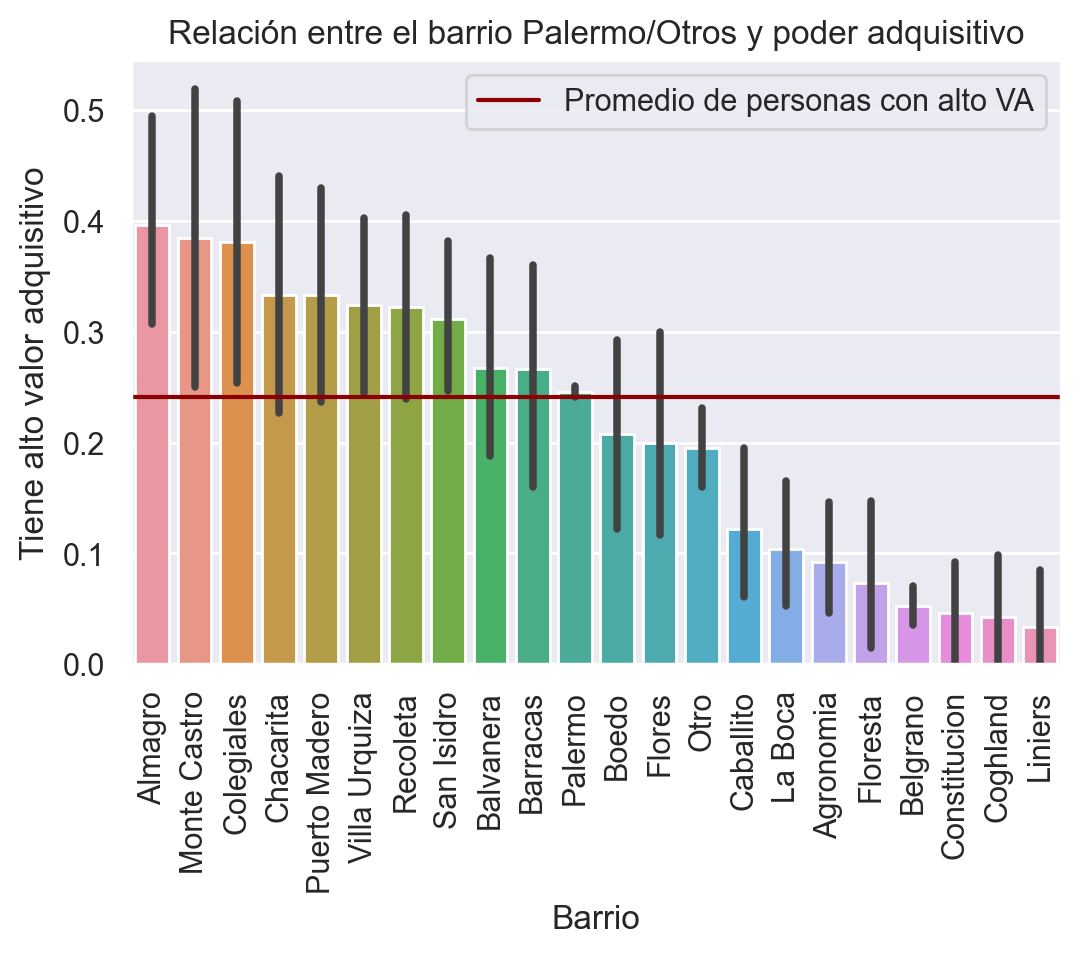

In [17]:
plt.figure(dpi=200)


df_barrio_vs_va = df[['barrio', 'tiene_alto_valor_adquisitivo']].copy()
df_barrio_vs_va['barrio'] = df_barrio_vs_va['barrio'].apply(lambda x: x if x in barrios_significativos else 'Otro')
orden = df_barrio_vs_va.groupby(['barrio'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : sum(x)/len(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_barrio_vs_va,
    x='barrio',
    y='tiene_alto_valor_adquisitivo',
    order=orden['barrio']
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Barrio")
plt.xticks(rotation=90)
plt.title('Relación entre el barrio Palermo/Otros y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

El barrio en el que la gente vive no nos permite decidir si tienen un alto poder adquisitivo pero sí nos permiten ver si no lo tienen. Como es el caso de los barrios desde caballito hacia la derecha. 

### Relación entre años de educación y poder adquisitivo

In [ ]:
Veamos cómo se relacionan los años de educación alcanzados con el poder adquisitivo.

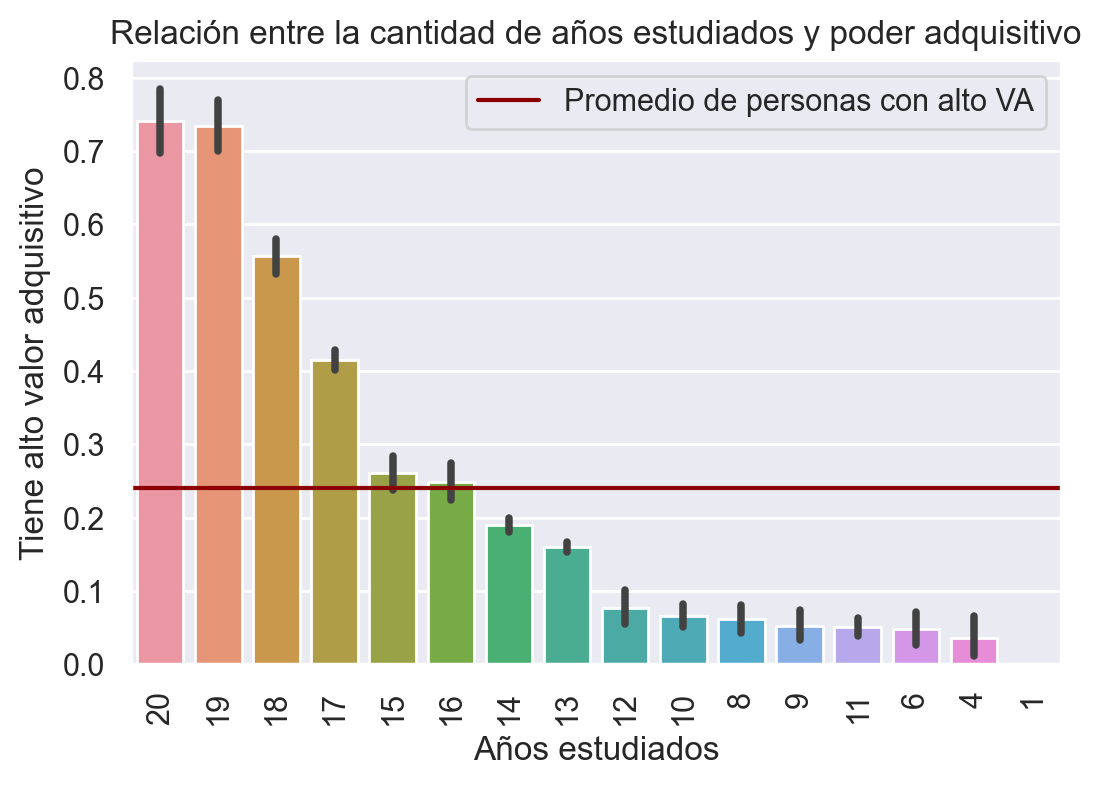

In [29]:
plt.figure(dpi=200)

df_educacion_vs_va = df[['anios_estudiados', 'tiene_alto_valor_adquisitivo']].copy()
orden = df_educacion_vs_va.groupby(['anios_estudiados'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : sum(x)/len(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_educacion_vs_va,
    x='anios_estudiados',
    y='tiene_alto_valor_adquisitivo',
    order=orden['anios_estudiados']
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Años estudiados")
plt.xticks(rotation=90)
plt.title('Relación entre la cantidad de años estudiados y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Vemos que hay una relación muy marcada entre estas dos variables, donde quienes tienen 12 años de estudio o menos se encuentran entre la población de menor poder adquisitivo, y quienes superan los 18 años de estudio tienden a tener un poder adquisitivo alto.

### Relación entre el rol familiar y el poder adquisitivo

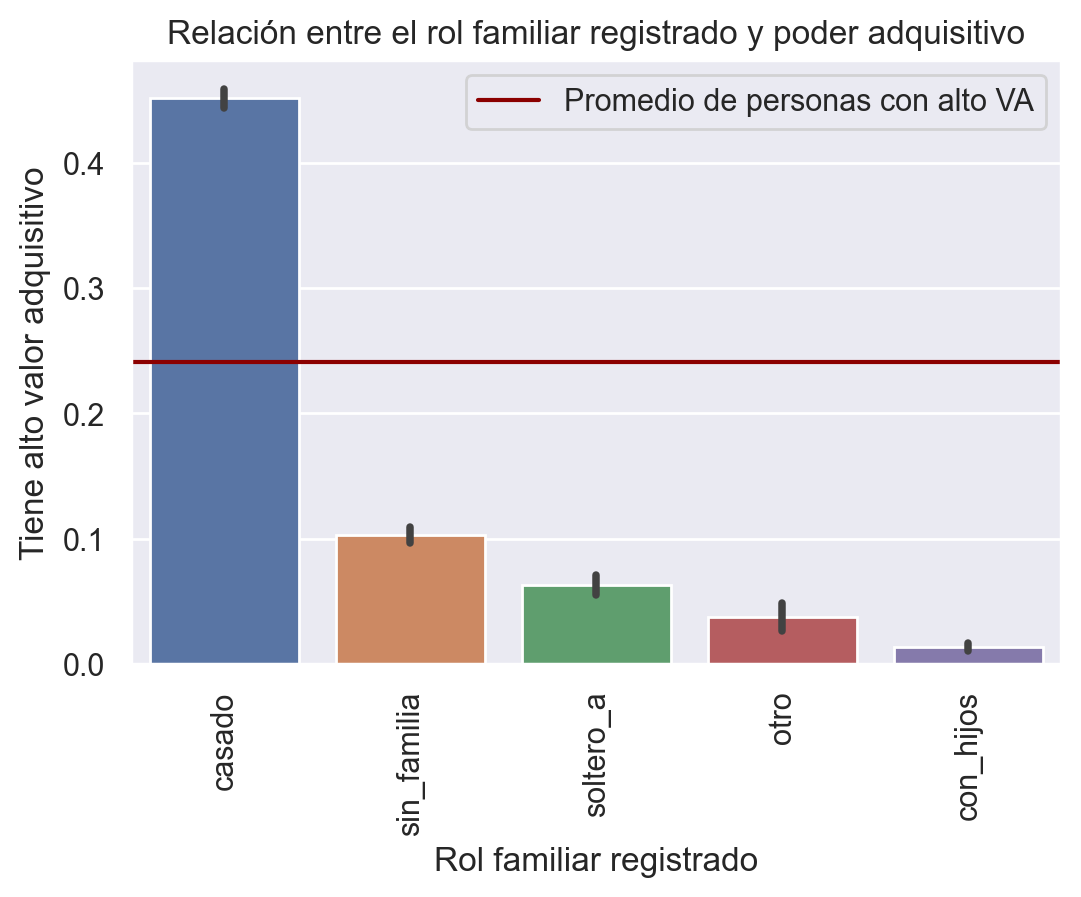

In [44]:
plt.figure(dpi=200)


df_rol_familiar_vs_va = df[['rol_familiar_registrado', 'tiene_alto_valor_adquisitivo']].copy()
orden = df_rol_familiar_vs_va.groupby(['rol_familiar_registrado'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : sum(x)/len(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_rol_familiar_vs_va,
    x='rol_familiar_registrado',
    y='tiene_alto_valor_adquisitivo',
    order=orden['rol_familiar_registrado']
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Rol familiar registrado")
plt.xticks(rotation=90)
plt.title('Relación entre el rol familiar registrado y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

### Relación entre el estado marital y el poder adquisitivo

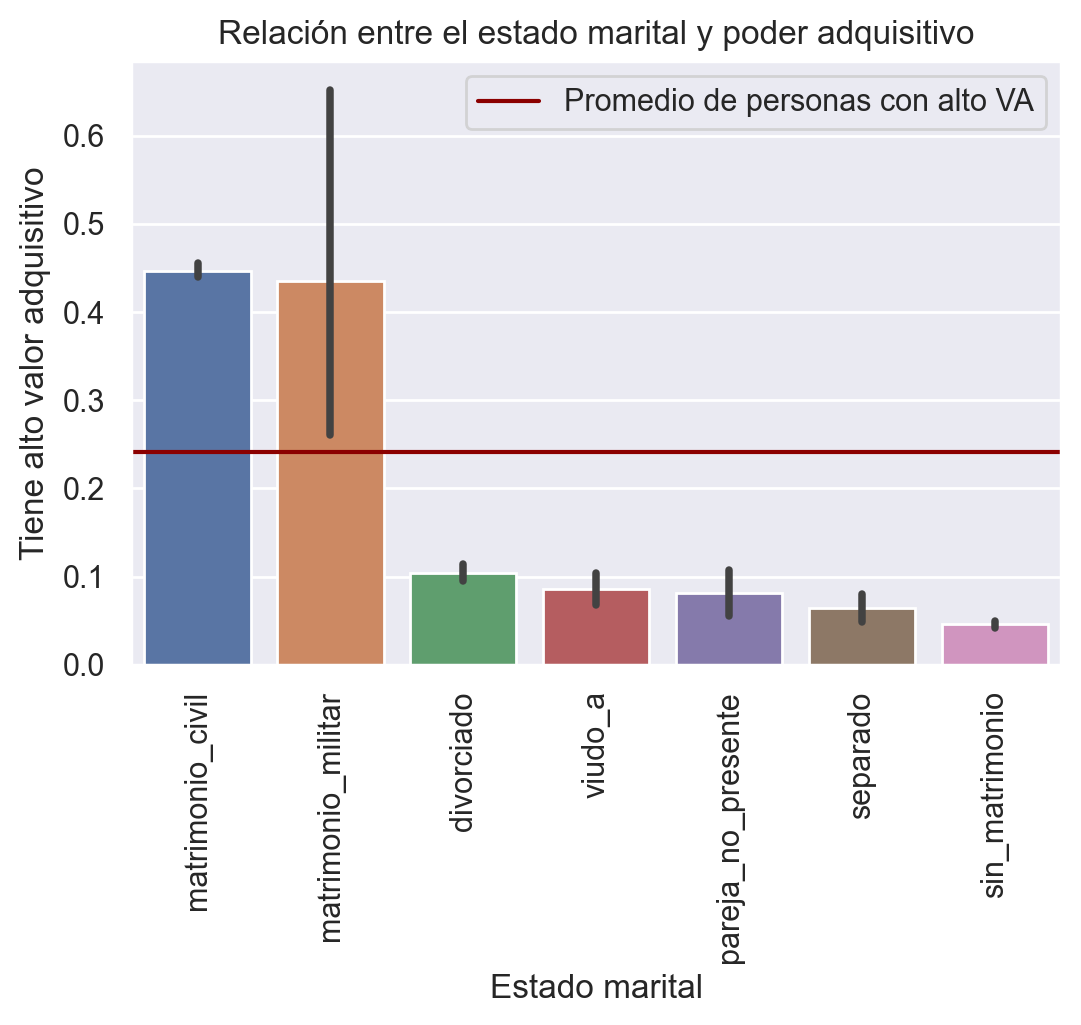

In [45]:
plt.figure(dpi=200)


df_estado_marital_vs_va = df[['estado_marital', 'tiene_alto_valor_adquisitivo']].copy()
orden = df_estado_marital_vs_va.groupby(['estado_marital'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : sum(x)/len(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_estado_marital_vs_va,
    x='estado_marital',
    y='tiene_alto_valor_adquisitivo',
    order=orden['estado_marital']
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Estado marital")
plt.xticks(rotation=90)
plt.title('Relación entre el estado marital y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

### Relación entre el tipo de trabajo y el poder adquisitivo

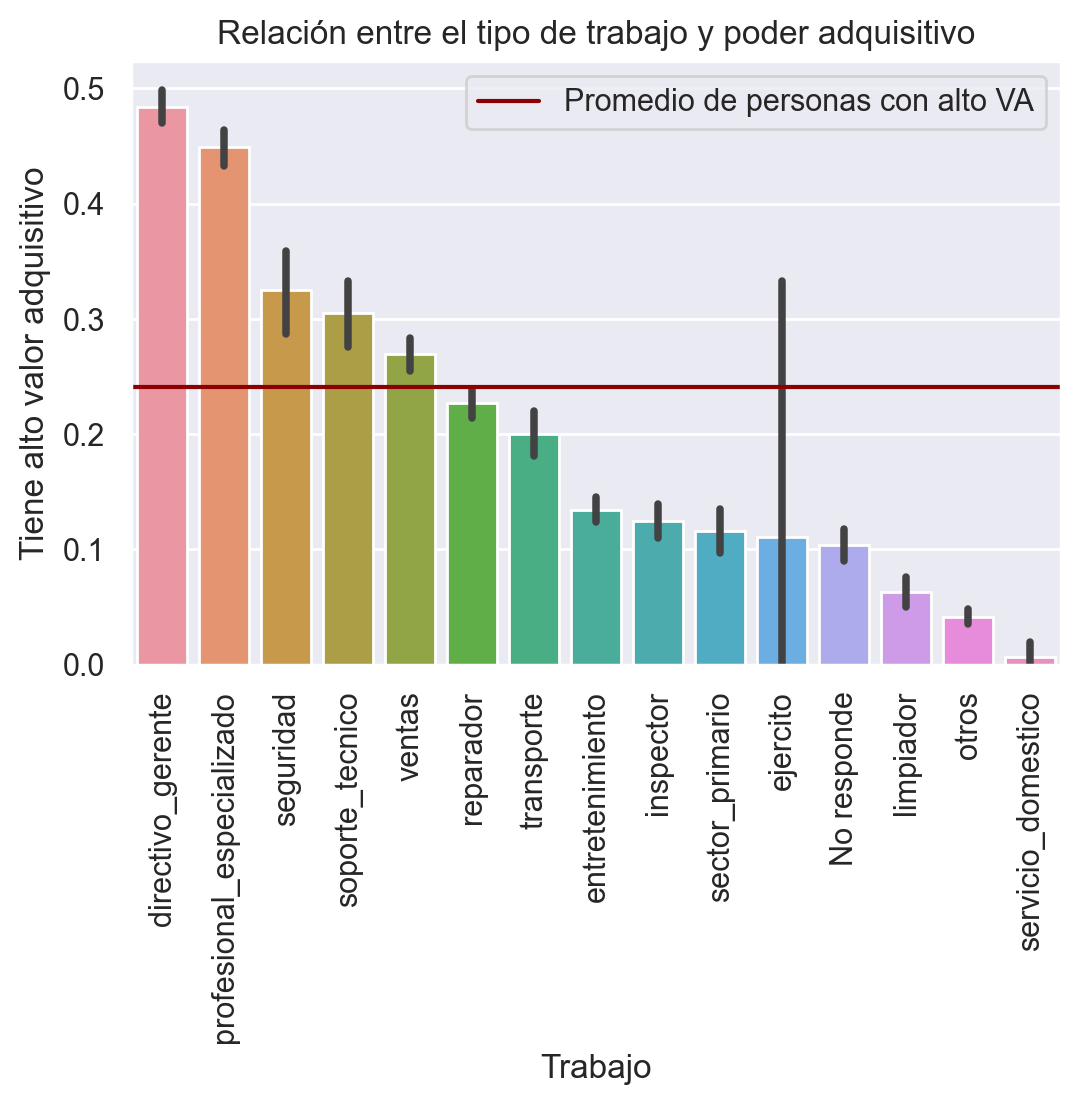

In [46]:
plt.figure(dpi=200)


df_trabajo_vs_va = df[['trabajo', 'tiene_alto_valor_adquisitivo']].copy()
orden = df_trabajo_vs_va.groupby(['trabajo'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : sum(x)/len(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_trabajo_vs_va,
    x='trabajo',
    y='tiene_alto_valor_adquisitivo',
    order=orden['trabajo']
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Trabajo")
plt.xticks(rotation=90)
plt.title('Relación entre el tipo de trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

### Relación con horas trabajadas

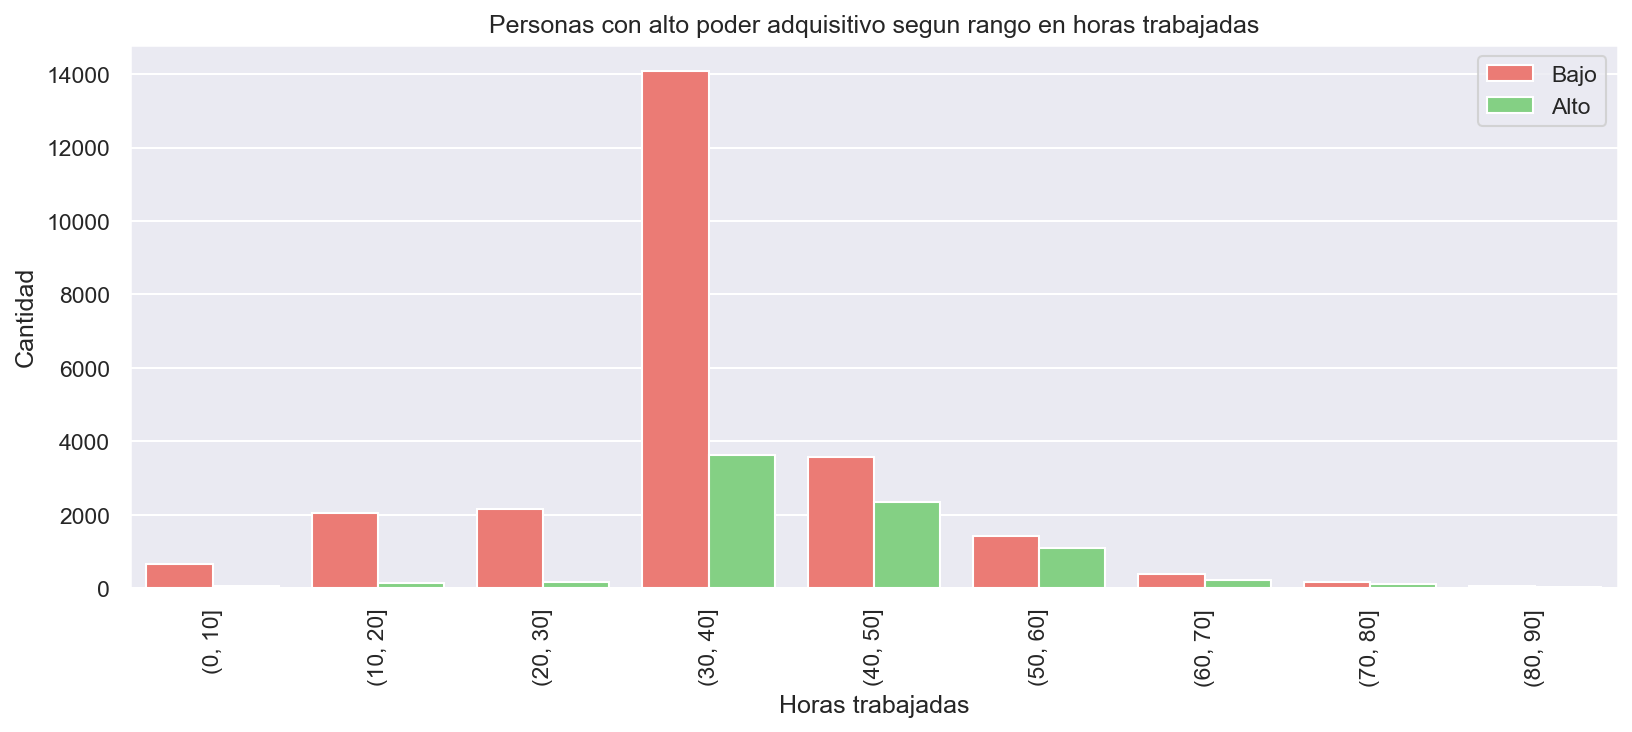

In [18]:
df_tmp = pd.DataFrame([df.horas_trabajo_registradas, df.tiene_alto_valor_adquisitivo]).transpose()
df_tmp['bins'] = pd.cut(df_tmp.horas_trabajo_registradas, range(0, 100, 10)) # ver si 10 o 5 el tamaño
# Configuro el grafico, armo el countplot y setteo labels varios
fig, ax = plt.subplots(dpi=150, figsize=(6.4 * 2, 4.8))
sns.countplot(data = df_tmp, x = 'bins', hue='tiene_alto_valor_adquisitivo', ax = ax, palette = ['#ff6961', '#77dd77'])
ax.set_title('Personas con alto poder adquisitivo segun rango en horas trabajadas')
ax.set_xlabel('Horas trabajadas')
plt.xticks(rotation=90)
ax.set_ylabel('Cantidad')
plt.legend(['Bajo', 'Alto'], loc='upper right')

### Religion

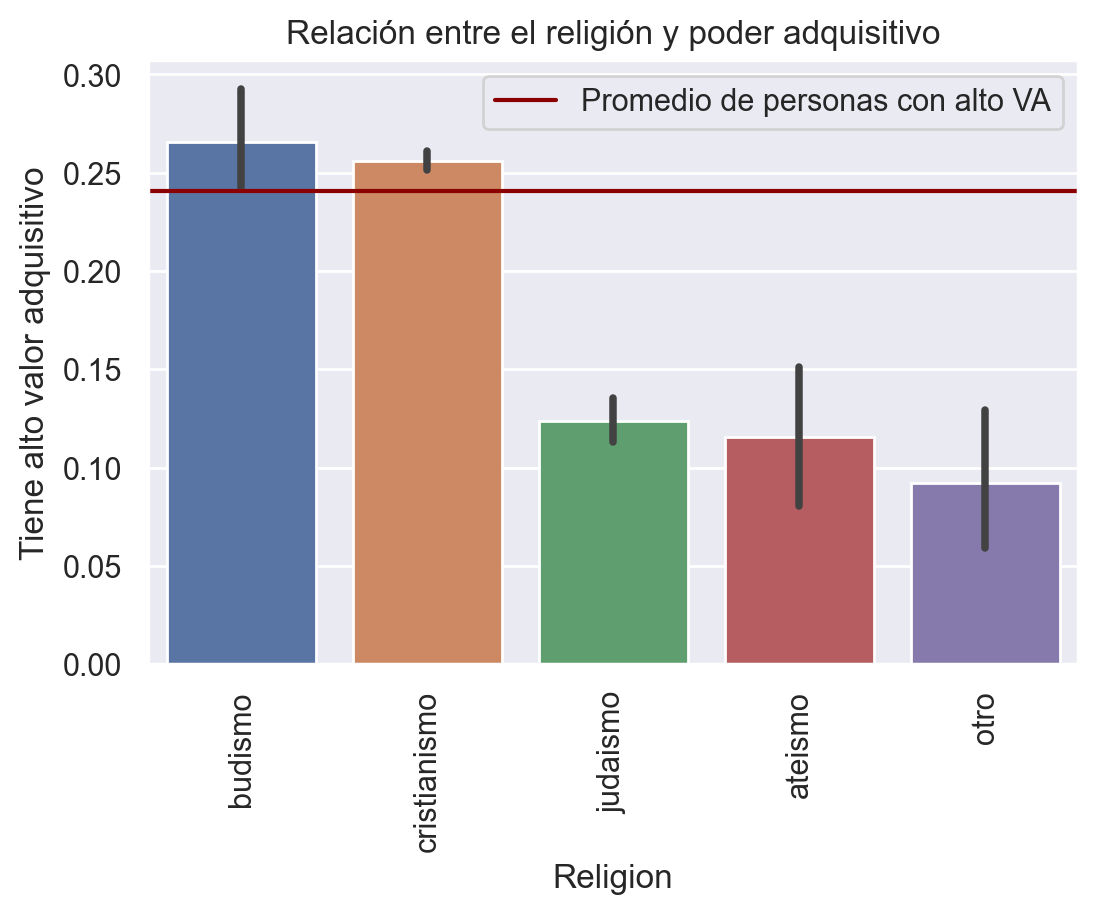

In [19]:
plt.figure(dpi=200)


orden = df.groupby(['religion'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : sum(x)/len(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df,
    x='religion',
    y='tiene_alto_valor_adquisitivo',
    order=orden['religion']
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Religion")
plt.xticks(rotation=90)
plt.title('Relación entre el religión y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

### Género

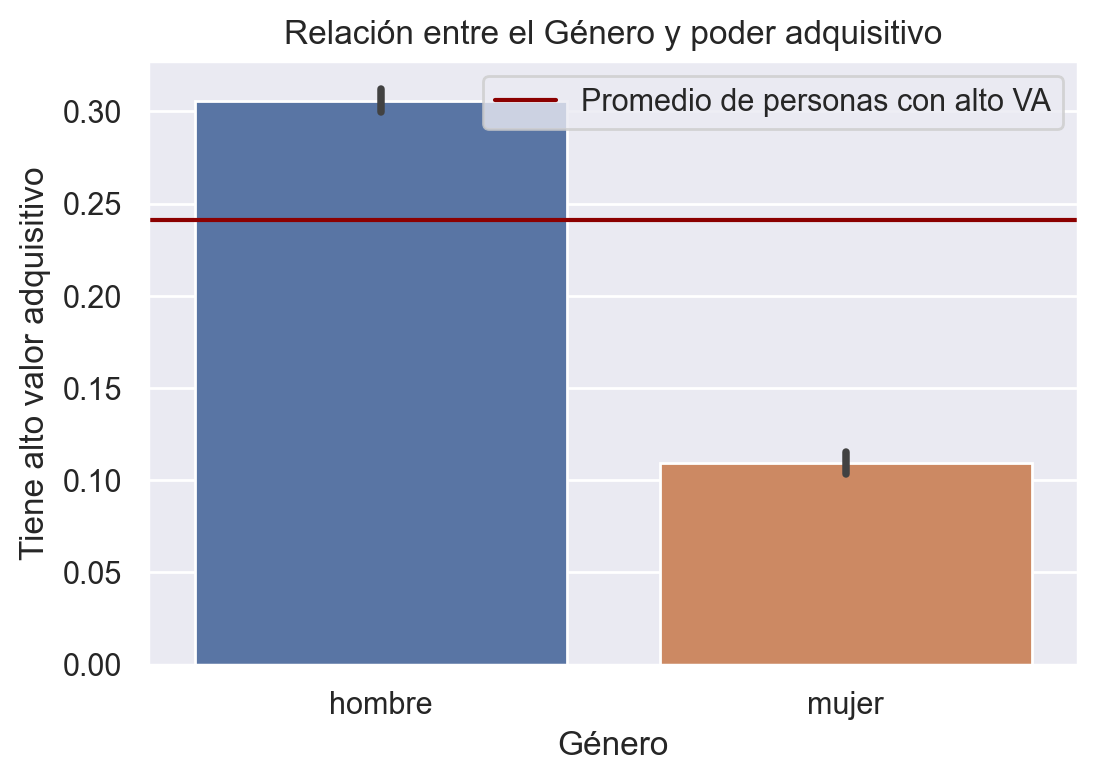

In [20]:
plt.figure(dpi=200)


orden = df.groupby(['genero'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : sum(x)/len(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df,
    x='genero',
    y='tiene_alto_valor_adquisitivo',
    order=orden['genero']
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Género")
plt.title('Relación entre el Género y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

In [ ]:
plt.figure(dpi=100)
df["tiene_alto_valor_adquisitivo"].value_counts().plot(
    kind='pie', autopct='%1.0f%%', colors=['#AEB8AF', '#4AD172']
)
plt.title('¿Tiene alto valor adquisitivo?')
plt.ylabel("")
plt.show()

Veamos si hay una relación entre la religión y el género que incidan sobre el poder adquisitivo de las personas muestreadas.

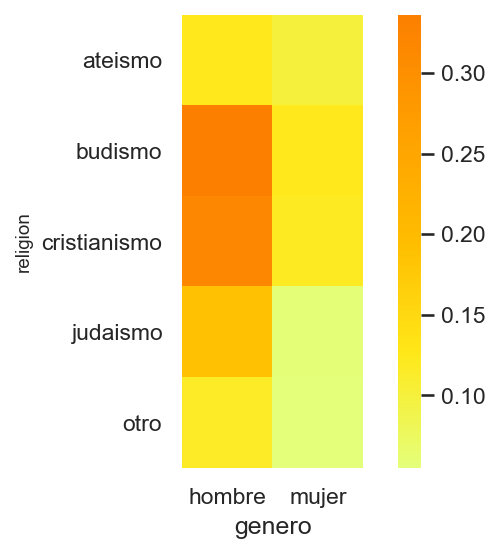

In [26]:
cooccurrence = pd.pivot_table(
    df,
    'tiene_alto_valor_adquisitivo',
    'religion',
    'genero',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del genero y la religion", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Vemos que las mujeres que indicaron el judaísmo u otra religión presentan un bajo poder adquisitivo en general, pero en otros casos no parece ser una variable que sirva para determinar el valor de la variable target.

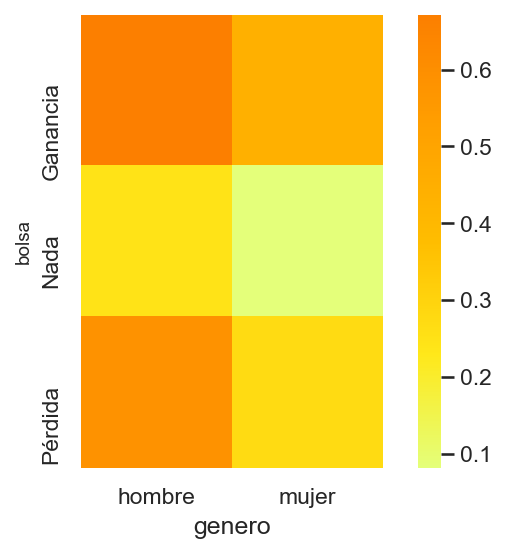

In [28]:
df_bolsa_vs_va = df[['genero','ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_bolsa_vs_va['bolsa'] = df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
del df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina']

cooccurrence = pd.pivot_table(
    df_bolsa_vs_va,
    'tiene_alto_valor_adquisitivo',
    'bolsa',
    'genero',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del genero y sus movimientos en la bolsa argentina", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Consideramos nivel universitario completo a quienes tengan más de 17 años de estudio

In [38]:
def categorizar_por_educacion(anios_estudiados):
    if(anios_estudiados <= 1):
        return 'prescolar'
    elif(anios_estudiados <= 9):
        if(anios_estudiados == 9):
            return 'primario_completo'
        return 'primario_incompleto'
    elif(anios_estudiados <= 14):
        if(anios_estudiados== 14):
            return 'secundario_completo'
        return 'secundario_incompleto'
    elif(anios_estudiados <= 17):
        return 'universitario_incompleto'
    return 'universitario_completo'

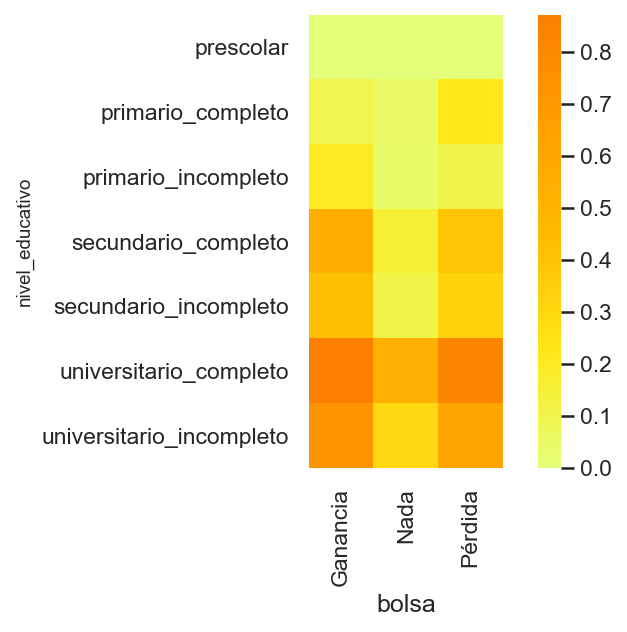

In [48]:
df_tmp = df[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['bolsa'] = df_tmp['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'bolsa',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y el rendimiento en la bolsa", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

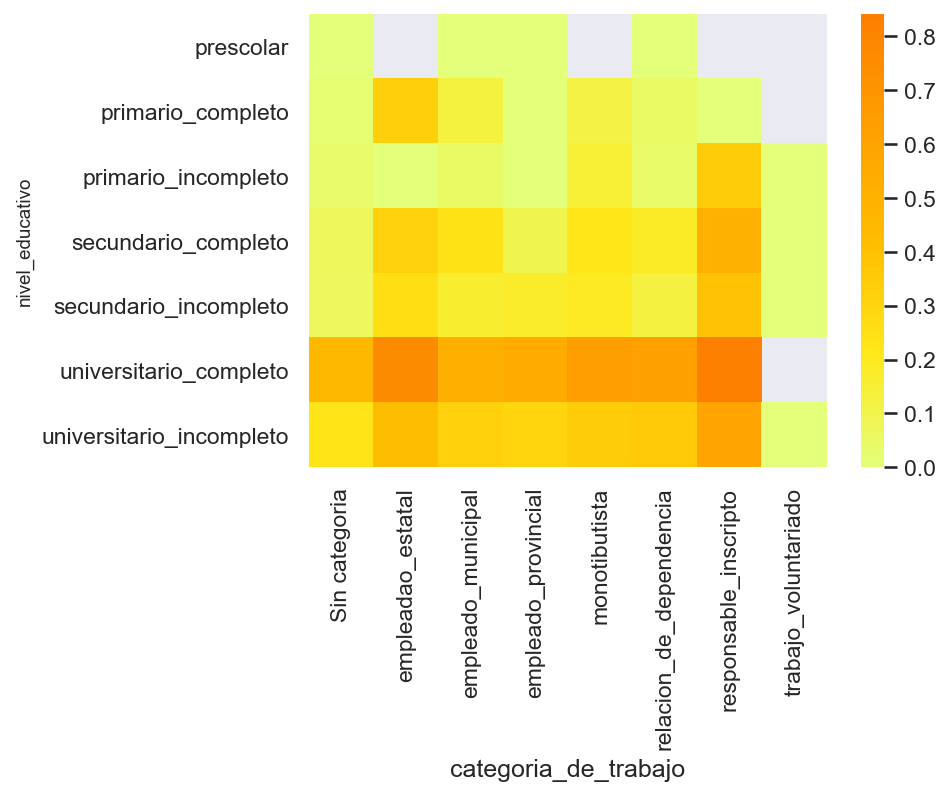

In [40]:
df_tmp = df[['anios_estudiados', 'categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'categoria_de_trabajo',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y la categoria de trabajo", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()


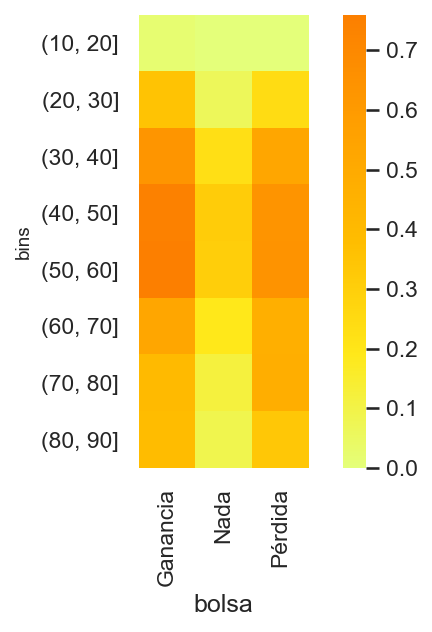

In [49]:

df_tmp = df[['edad', 'ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['bolsa'] = df_tmp['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
df_tmp['bins'] = pd.cut(df_tmp.edad, range(0, int(df_tmp['edad'].max()) + 10,10))

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'bins',
    'bolsa',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del rango etario y el rendimiento en la bolsa", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

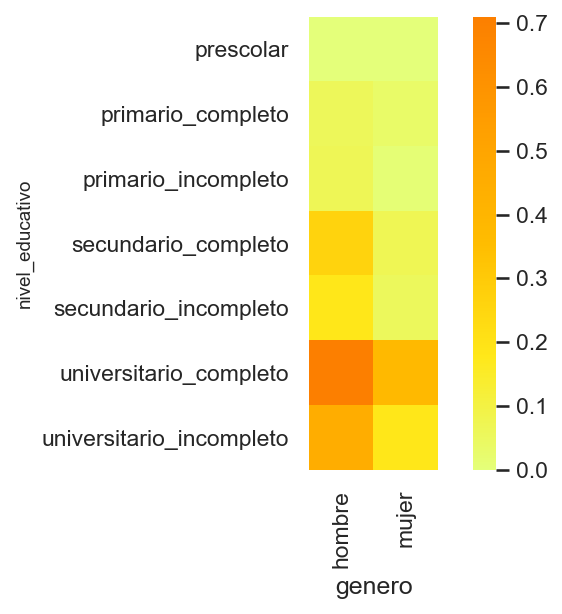

In [41]:
df_tmp = df[['anios_estudiados', 'genero', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'genero',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y el genero", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

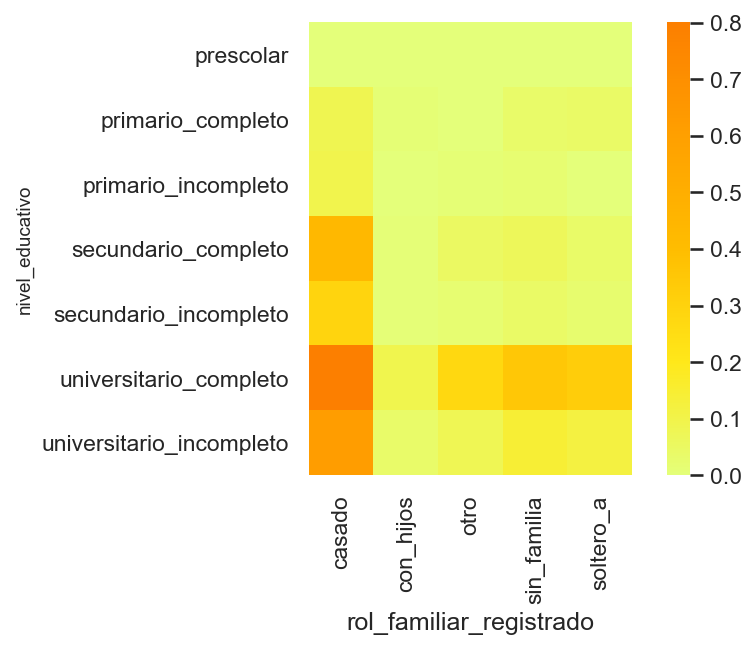

In [42]:
df_tmp = df[['anios_estudiados', 'rol_familiar_registrado', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'rol_familiar_registrado',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y el rol familiar registrado", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

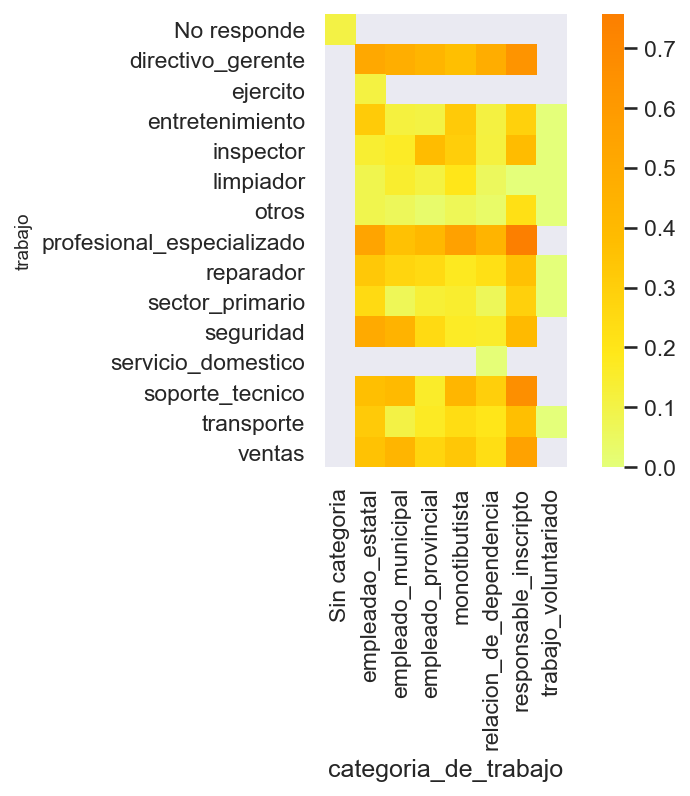

In [47]:
df_tmp = df[['trabajo', 'categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'trabajo',
    'categoria_de_trabajo',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del trabajo y la categoria de trabajo", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

TODO: En lugar de un heatmap, podríamos cambiar por dos barplots, uno para hombres y otro para mujeres, con el rendimiento en la bolsa para cada género.

In [ ]:
TODO: relación entre horas trabajadas y rendimiento en la bolsa

In [ ]:
TODO: años de educación alcanzada

In [ ]:
def baseline(df):
   '''
   if(declara mov en bolsa and resultado != 0)
        # Poder adq alto -> return
    
   elif(edad < 20 or edad > 70):
        # Poder adq bajo

    
        
    if (barrio in (Caballito La Boca Agronomia Floresta Belgrano Constitucion Coghland Liniers)):
        # Poder adq bajo
    
    if (horas trabajadas < 30):
        # Poder adq bajo
   
   '''
    